# Weight Details Editor
Author: Brent Artuch <br>
Date: 2023-06-04

## Introduction

The code in this notebook works with the `weight_details` table in the `diet` SQLite database. Entries
are added to the table and then the statistical visualizations are updated based on the new data. The
measurements are taken using a Samsung Galaxy Watch. This section of the overall Food and Nutrition
project determines changes that will be made to the diet portion of the program in attempt to achieve new
results. The major trends include `body_fat_percentage`, `muscle_mass`, and `fat_mass`.

## Step 1: Imports
### Import packages

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset
The dataset is imported from the `weight_details` table in the `diet` SQLite database using a basic query.

In [2]:
sql_connection = sqlite3.connect('diet.sqlite')
# Import the desired table and set the index.
current_details = pd.read_sql('SELECT * FROM weight_details_2023', sql_connection, index_col='index')
current_details.tail(10)

,entry_id,date_time,body_weight,bodyfat_percentage,muscle_mass,fat_mass,workout_type
index,,,,,,,
48,1000049,2023-06-16 14:23:09,195.6,25.8,79.0,50.4,LEGS
49,1000050,2023-06-17 14:37:12,195.6,24.0,81.3,47.0,REST
50,1000051,2023-06-18 14:45:48,195.6,24.7,80.5,48.2,CHST
51,1000052,2023-06-19 15:38:51,195.4,26.4,78.1,51.7,BACK
52,1000053,2023-06-20 17:13:39,195.8,28.1,76.1,55.0,BACK
53,1000054,2023-06-21 15:30:44,196.2,24.5,81.0,48.1,REST
54,1000055,2023-06-23 16:01:20,196.4,25.1,80.3,49.3,REST
55,1000056,2023-06-26 12:32:36,193.0,25.9,77.8,49.9,LEGS
56,1000057,2023-06-27 14:06:29,194.0,25.5,78.7,49.4,REST


## Step 2: Data Exploration
Next get a sense of the size and contents of `current_details`.

In [3]:
current_details.shape

(58, 7)

In [4]:
current_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   entry_id            58 non-null     int64  
 1   date_time           58 non-null     object 
 2   body_weight         58 non-null     float64
 3   bodyfat_percentage  58 non-null     float64
 4   muscle_mass         58 non-null     float64
 5   fat_mass            58 non-null     float64
 6   workout_type        58 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ KB


In [5]:
current_details[['body_weight', 'bodyfat_percentage', 'muscle_mass', 'fat_mass']].describe()

,body_weight,bodyfat_percentage,muscle_mass,fat_mass
count,58.000000,58.000000,58.000000,58.000000
mean,194.544828,25.418966,79.056897,49.467241
std,2.118521,0.934233,1.166658,2.146019
min,189.600000,23.100000,76.100000,43.900000
25%,193.200000,25.025000,78.400000,48.325000
50%,195.000000,25.400000,78.800000,49.500000
75%,196.000000,26.000000,80.000000,50.475000
max,198.600000,28.100000,81.500000,55.000000


## Step 3: Update the Dataset
Populate and insert the `new_entry` to be inserted into `current_details` to create the `new_details`.

In [6]:
# Create a new entry.
e_id = current_details.iloc[-1, 0] + 1
weight_entry = float(input("Enter Weight: "))
bf_entry = float(input("Enter Body Fat Percentage: "))
mm_entry = float(input("Enter Muscle Mass: "))
fm_entry = float(input("Enter Fat Mass: "))
wt_entry = input("Enter Workout Type: ")
new_entry = [e_id, pd.to_datetime("today").round(freq="S"), weight_entry, bf_entry, mm_entry, fm_entry, wt_entry]
current_details.loc[len(current_details)] = new_entry
current_details['date_time'] = pd.to_datetime(current_details['date_time'])
new_details = current_details
new_details.tail()

,entry_id,date_time,body_weight,bodyfat_percentage,muscle_mass,fat_mass,workout_type
index,,,,,,,
54,1000055,2023-06-23 16:01:20,196.4,25.1,80.3,49.3,REST
55,1000056,2023-06-26 12:32:36,193.0,25.9,77.8,49.9,LEGS
56,1000057,2023-06-27 14:06:29,194.0,25.5,78.7,49.4,REST
57,1000058,2023-06-28 14:45:27,193.2,26.2,77.5,50.5,CHST
58,1000059,2023-06-29 13:26:03,197.4,26.1,79.5,51.5,REST


### Data Manipulation
This section exists for convenience should any alterations need to be made to the entries.

In [7]:
# Update data at position.
# current_details.loc[47, 'bodyfat_percentage'] = 23.8
# current_details['date_time'] = pd.to_datetime(current_details['date_time'])
# Drop operations
# current_details.drop(index=current_details.index[-1], axis=0, inplace=True) # Remove last row
new_details.tail()

,entry_id,date_time,body_weight,bodyfat_percentage,muscle_mass,fat_mass,workout_type
index,,,,,,,
44,1000045,2023-06-11 17:55:45,196.6,26.6,78.5,52.2,CHEST
45,1000046,2023-06-12 15:58:28,194.6,25.5,78.9,49.7,BACK
46,1000047,2023-06-13 15:27:21,196.0,25.0,80.3,48.9,REST
47,1000048,2023-06-15 14:52:06,195.4,23.8,81.5,46.5,REST
48,1000049,2023-06-16 14:23:09,195.6,25.8,79.0,50.4,LEGS


### Update SQL and CSV
Now that we have updated our table, we will export the new dataset to SQL. As a precaution, I always
back up the new dataset to CSV in the event that an unforeseen reset is required in the future.

In [7]:
# Export updated table to sql with time stamp.
new_details.to_sql('weight_details_2023', sql_connection, if_exists='replace')

59

In [8]:

new_details.to_csv(r'/Users/tukles/Library/CloudStorage/GoogleDrive-brent.artuch@gmail.com/My Drive/CSV/weight_details_2023.csv')

## Step 5: Visualize the Data
### Plot the trend of `bodyfat_percentage`, `body_weight`, `muscle_mass`, and `fat_mass` by `date_time`.

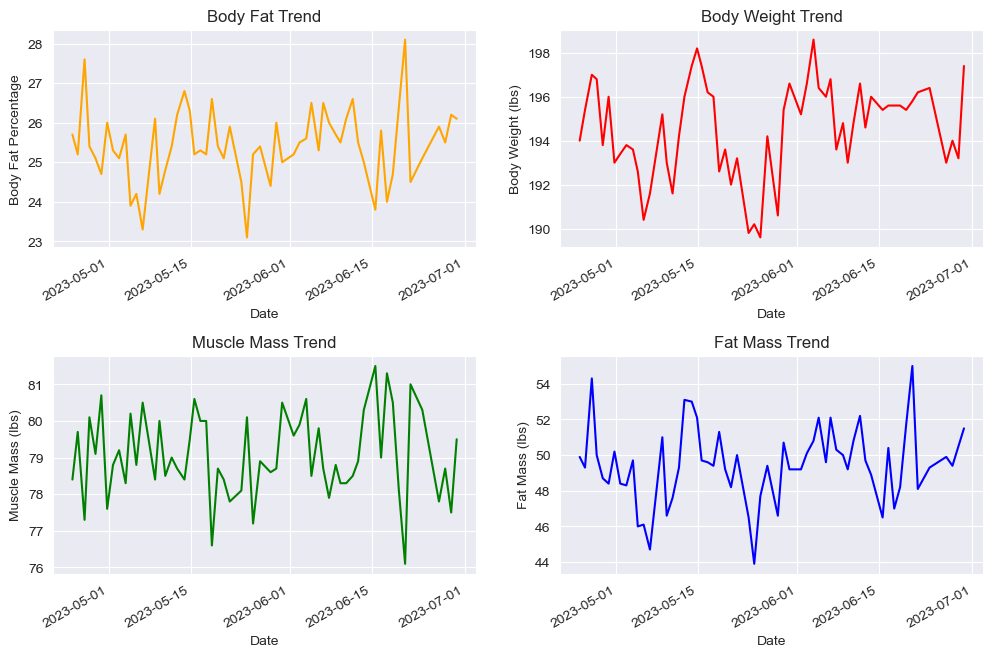

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

new_details.plot(
    ax=axes[0, 0], title="Body Fat Trend", x='date_time' , xlabel="Date",
    y='bodyfat_percentage', ylabel="Body Fat Percentage", legend=False,
    color='orange'
)
new_details.plot(
    ax=axes[0, 1], title="Body Weight Trend", x='date_time', xlabel="Date",
    y='body_weight', ylabel="Body Weight (lbs)", legend=False, color='red'
)
new_details.plot(
    ax=axes[1, 0], title="Muscle Mass Trend", x='date_time', xlabel="Date",
    y='muscle_mass', ylabel="Muscle Mass (lbs)", legend=False, color='green'
)
new_details.plot(
    ax=axes[1, 1], title="Fat Mass Trend", x='date_time', xlabel="Date",
    y='fat_mass', ylabel="Fat Mass (lbs)", legend=False, color='blue'
);


### Box plots to get a feel for the distribution and outliers.

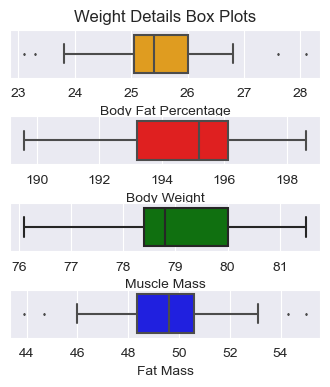

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(4,4))
plt.subplots_adjust(wspace=0.1, hspace=0.8)
sns.boxplot(data=None, x=new_details['bodyfat_percentage'], fliersize=1, ax=axes[0], color='orange').set(
    xlabel="Body Fat Percentage", title="Weight Details Box Plots"
)
sns.boxplot(data=None, x=new_details['body_weight'], fliersize=1, ax=axes[1], color='red').set(
    xlabel="Body Weight"
)
sns.boxplot(data=None, x=new_details['muscle_mass'], fliersize=1, ax=axes[2], color='green').set(
    xlabel="Muscle Mass"
)
sns.boxplot(data=None, x=new_details['fat_mass'], fliersize=1, ax=axes[3], color='blue').set(
    xlabel="Fat Mass"
);

### Histogram to determine which weight occurs most frequently.

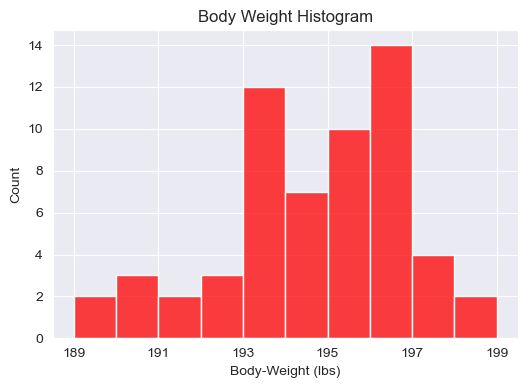

In [11]:
plt.figure(figsize=(6,4))
fig = sns.histplot(new_details['body_weight'], bins=range(189,200,1), color='red')
fig.set_xticks(range(189,200,2))
fig.set_xticklabels(range(189,200,2))
fig.set(xlabel="Body-Weight (lbs)", title="Body Weight Histogram");

<h2> LOG: </h2>
<ul>
  <li> 2023-05-15: Wine removed from the diet will determine effectiveness 14 days from the log date.
  <br> - NO EFFECTIVE CHANGE IN BODYFAT %</li>
  <br>
  <li> 2023-05-29: Reduce the range of the calorie cycle to determine effectiveness 14 days from the log date.
   <br> - Squeezing the calorie count had a positive impact on average muscle mass over the past
   two weeks. </li>
   <br>
  <li> 2023-06-16: Increase all the carb/fat goals to +100 calories and evaluate trends after 14 days. </li>
</ul>
